In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [47]:
dataset=("C:\\sentiment_analysis\\testdata.manual.2009.06.14.csv")
columns = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv(dataset, encoding='latin1', names=columns)

In [48]:
df.head()

,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [49]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [50]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

In [57]:
import re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def preprocess_data(input_path, output_path):
    #df = pd.read_csv(input_path, encoding='latin1', header=None)
    df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

    # Apply the cleaning function to the 'text' column
    df['cleaned_text'] = df['text'].apply(preprocess_text)

    # Create a 'sentiment' column based on the target values
    df['sentiment'] = df['target'].apply(lambda x: 0 if x == 0 else 1)  # Binary sentiment (0 or 1)

    # Keep only the necessary columns
    df = df[['cleaned_text', 'sentiment']]

    # Save the cleaned data to a new CSV file
    df.to_csv('C:\\sentiment_analysis\\data\\clean_testdata.csv', index=False)

C:\Users\ashwa\AppData\Local\Temp\ipykernel_19212\54621034.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette="Set2")


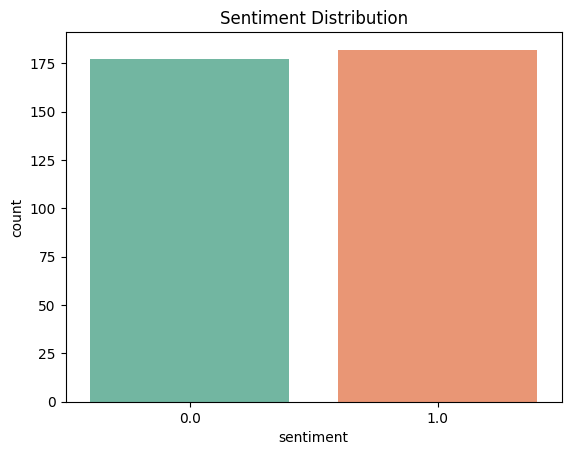

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot sentiment distribution
sns.countplot(data=df, x='sentiment', palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

In [44]:
!pip install spacy 
!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.8 MB 3.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.8 MB 4.4 MB/s eta 0:00:03
   ----------- ---------------------------- 3.4/11.8 MB 6.3 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.8 MB 8.9 MB/s eta 0:00:01
   ----------------------------------- ---- 10.5/11.8 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   --------------------------------------- 632.6/632.6 kB 24.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.3 MB/s eta 0:00:00
   ------------------

In [61]:
import spacy
 
# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')
 
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
 
    # Tokenization using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]
 
    # Further text processing...
    return ' '.join(tokens)
 
 
def preprocess_data(input_path, output_path):
    df = pd.read_csv(input_path, encoding='latin1', header=None)
    df.columns = ['target', 'id', 'date', 'query', 'user', 'text']
   
    # Apply the cleaning function to the 'text' column
    df['cleaned_text'] = df['text'].apply(preprocess_text)
   
    # Create a 'sentiment' column based on the target values
    df['sentiment'] = df['target'].apply(lambda x: 0 if x == 0 else 1)  # Binary sentiment (0 or 1)
   
    # Keep only the necessary columns
    df = df[['cleaned_text', 'sentiment']]
   
    # Save the cleaned data to a new CSV file
    df.to_csv(output_path, index=False)
input_path=r"C:\sentiment_analysis\testdata.manual.2009.06.14.csv"
 
output_path='C:\\sentiment_analysis\\data\\cleaned_tweets.csv'
 
preprocess_data(input_path,output_path)

In [63]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]

    # Remove punctuation and stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in nlp.Defaults.stop_words]

    # Join the tokens back to form the cleaned text
    return " ".join(tokens)

# Ensure that the preprocessing function is applied to each row in the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Verify the new column
print(df.columns)
print(df.head())


Index(['sentiment', 'id', 'date', 'query', 'user', 'text', 'cleaned_text'], dtype='object')
   sentiment  id                          date    query      user  \
0        1.0   3  Mon May 11 03:17:40 UTC 2009  kindle2    tpryan   
1        1.0   4  Mon May 11 03:18:03 UTC 2009  kindle2    vcu451   
2        1.0   5  Mon May 11 03:18:54 UTC 2009  kindle2    chadfu   
3        1.0   6  Mon May 11 03:19:04 UTC 2009  kindle2     SIX15   
4        1.0   7  Mon May 11 03:21:41 UTC 2009  kindle2  yamarama   

                                                text  \
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...   
1  Reading my kindle2...  Love it... Lee childs i...   
2  Ok, first assesment of the #kindle2 ...it fuck...   
3  @kenburbary You'll love your Kindle2. I've had...   
4  @mikefish  Fair enough. But i have the Kindle2...   

                                   cleaned_text  
0    loooooooovvvvvveee dx cool fantastic right  
1             reading love lee childs good read  
2     

In [64]:
df['text'] = df['text'].fillna('')

In [65]:
print(df['sentiment'].value_counts())

sentiment
1.0    182
0.0    177
Name: count, dtype: int64


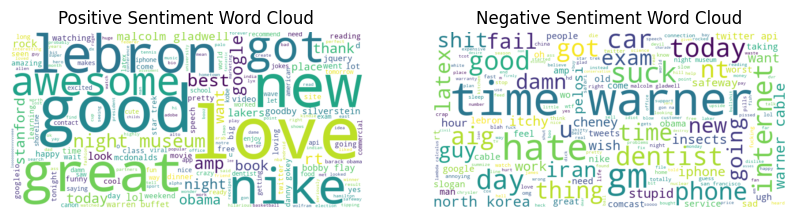

In [66]:
import wordcloud
from wordcloud import WordCloud
#df['text'] = df['text'].fillna('')
# Generate word cloud for positive sentiments
positive_text = " ".join(df[df['sentiment'] == 4]['cleaned_text'])
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_text'])
# Check for positive and negative text lengths
positive_text = " ".join(df[df['sentiment'] == 1]['cleaned_text'])
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_text'])

if len(positive_text) == 0:
    print("No positive text available for word cloud.")
else:
    # Create word cloud for positive sentiment
    positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

if len(negative_text) == 0:
    print("No negative text available for word cloud.")
else:
    # Create word cloud for negative sentiment
    negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

# Display the word clouds if they exist
import matplotlib.pyplot as plt

if len(positive_text) > 0:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Positive Sentiment Word Cloud")

if len(negative_text) > 0:
    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Negative Sentiment Word Cloud")

plt.show()

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Vectorize text
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

nmf = NMF(n_components=5, random_state=42)  # Specify the number of topics
nmf.fit(X)

# Display topics
for idx, topic in enumerate(nmf.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['suck', 'hate', 'phone', 'today', 'watch', 'rt', 'internet', 'cable', 'warner', 'time']
Topic 2:
['today', 'went', 'old', 'awesome', 'movie', 'saw', 'trek', 'star', 'museum', 'night']
Topic 3:
['canon', 'toy', 'rt', 'lol', 'ooooh', 'getting', 'obama', 'place', 'got', 'love']
Topic 4:
['day', 'kobe', 'dentist', 'google', 'car', 'like', 'gm', 'lebron', 'hate', 'good']
Topic 5:
['eos', 'malcolm', 'gladwell', 'brand', 'api', 'twitter', 'blog', 'canon', 'nike', 'new']


In [68]:
df

,sentiment,id,date,query,user,text,cleaned_text
0,1.0,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,loooooooovvvvvveee dx cool fantastic right
1,1.0,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,reading love lee childs good read
2,1.0,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",ok assesment fucking rocks
3,1.0,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,love months looked new big huge need remorse
4,1.0,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,fair think perfect
...,...,...,...,...,...,...,...
493,NaN,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...,ask programming latex indesign submitted link ...
494,0.0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat...",note hate word hate pages hate latex said hate...
495,1.0,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...,ahhh real text editing environment latex
496,0.0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",trouble iran hmm iran iran far away flockofsea...


In [69]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'text', 'cleaned_text'], dtype='object')